In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Term Project - Minh Doan

## Chosen Topic:
### Explore the low volatility anomaly which suggests that portfolios of stocks with lower volatility (and thus lower risk) earn equal or larger returns when compared to portfolios of stocks with higher volatility (and thus higher risk). We consider this observation an anomaly because, if a portfolio is reasonably well-diversified, the portfolio risk should be described almost exclusively by its  𝛽  and a higher  𝛽  ought to lead to higher returns.

The data is provided to you:

In [2]:
df = pd.read_csv("Term_Project_Data.csv", index_col=0, parse_dates=True)
df.info()
# list(df.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2002-01-31 to 2021-12-31
Columns: 361 entries, A to MKT
dtypes: float64(361)
memory usage: 678.8 KB


### Topic 1: Low Volatility Anomaly
Use the data frame df to explore the low volatility anomaly. Your analysis is going to consist of two parts. First, you explore the return earned by ten different portfolios in which the stocks are ordered by volatility. Then you test if a portfolio of high-beta stocks outperforms a portfolio of low-beta stocks in the medium term.

#### Part a)
Estimate the  𝛽  for each stock with an ordinary least squares regression. (It is advisable to run a loop to perform these 360 regressions and to store the results. Then plot a histogram of the values for  𝛽 . Use np.linspace(-1, 4, 51) for the bins in the histogram.
- Discuss the histogram. 
- Look at one stock among the 10 largest and one stock among the 10 smallest values for  𝛽 . Explain why you would expect a very large or very small  𝛽  for these stocks, respectively.

The given 𝛽 can be calculated as standard deviation

In [3]:
import statsmodels.formula.api  as sm
beta = {}
for stock in df.columns[:-1]:
    mod_fit = sm.ols(data=df.loc[:, [stock, "MKT"]],
                     formula=stock + "~MKT").fit()
    beta[stock] = mod_fit.params.loc["MKT"]

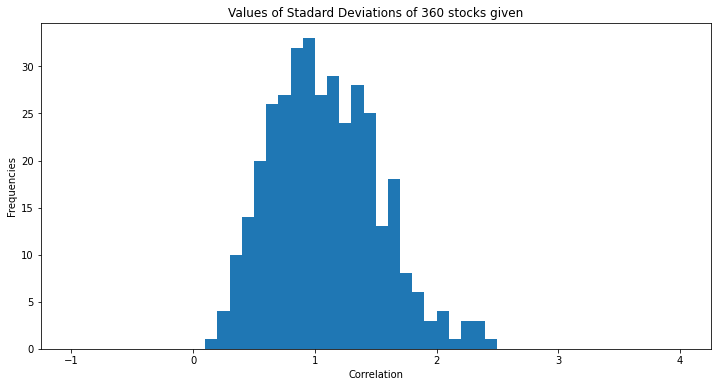

In [4]:
beta_df = pd.DataFrame.from_dict(beta, orient="index", columns=["Beta"]);
fig, ax = plt.subplots(figsize = (12,6));
ax.hist(beta_df, bins = np.linspace(-1, 4, 51));
ax.set_xlabel("Correlation");
ax.set_ylabel("Frequencies");
ax.set_title("Values of Stadard Deviations of 360 stocks given");

#### Discuss the Histogram:
- The histogram shows a similar shape to the Bell curve, which ensures our data does not have a large amount of outliers. 
- Our histogram shows the stock returns also centered around 1. This means majority of the stocks behave similar to each other, almost at the same increments or decrement. 

In [5]:
beta_df['Beta'].nlargest(n=10)

RCL    2.462931
AMD    2.371799
MGM    2.352854
AIG    2.305036
URI    2.264510
LNC    2.242143
GT     2.217756
HIG    2.183087
C      2.075970
APA    2.040720
Name: Beta, dtype: float64

In [6]:
beta_df['Beta'].nsmallest(n=10)

ED     0.165954
WEC    0.219450
SO     0.229234
HSY    0.290025
NEM    0.290032
GIS    0.301272
CLX    0.316291
CHD    0.326687
HRL    0.333844
FE     0.350400
Name: Beta, dtype: float64

#### Look at one stock among the 10 largest and one stock among the 10 smallest values for 𝛽. Explain why you would expect a very large or very small 𝛽 for these stocks, respectively.
- One of top 10: Stock AMD - AMD is a semiconductor company. This does explain why its Beta is high, however, this is due to the rise of its success during the time period that the data is taken from. 
- One of bottom 10: Stock ED - ED is an investor-owned energy company. ED has a very minimal change in its stock price, and this can be contributed to the lack of needs for the company. In my opinion, the lack of growth and the lack of investor's interest in energy investment creates the low range of stock volatility
- From a stock investor's perspective, the volatility does show the value against the growth of stocks. A company that has low beta, could still be have a large cap. This would make the company a staple company, and would be able to protect its' stock price over time. Inversely, a company with a large beta could have a small cap, hence would make the company a risk to invest in. 

#### Part b)
Sort the 360 stocks into decile, i.e., form 10 equal-weighted portfolios of 36 stocks each such that the first portfolio contains the 36 stocks with the lowest standard deviation over the 20 year period and the last portfolio contains the 36 stocks with the highest standard deviation over the 20 year period.
- Compute the average return for each portfolio.
- Compute the variance for each portfolio.
- Run a regression against the market portfolio for each portfolio to estimate  𝛽.

In [7]:
sorted_beta = beta_df.sort_values(by = "Beta", ascending = True)
# sorted_beta.index[0]

In [8]:
beta_portfolios = {}
for i in range(0, 10):
    beta_portfolios["port_"+str(i)] = []
    for row in range(0, 36):
        beta_portfolios["port_"+str(i)].append([sorted_beta.index[36 * i + row], 
                                               sorted_beta["Beta"][36 * i + row]])
# beta_portfolios 

In [9]:
from statistics import mean, variance
avg_return = []
var_return = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[1])
    avg_return.append(mean(temp_array))
    var_return.append(variance(temp_array))
#         break
#     break    
print("Average return of each portfolio is: ", avg_return, "\n")
print("Variance of each portfolio is: ", var_return)

Average return of each portfolio is:  [0.40816700454863103, 0.6158974167118969, 0.7571046577215497, 0.8644768774086135, 0.9914566235612723, 1.1120220058850239, 1.2398343490812789, 1.3755491521622103, 1.5524734776491316, 1.9162165151655943] 

Variance of each portfolio is:  [0.009014056013214982, 0.0020201939890536675, 0.0014234439132038898, 0.0017191640006951378, 0.0008717024504520261, 0.0011430203384703603, 0.001997079037062488, 0.0018051827172448015, 0.004635459175265596, 0.05689805167894954]


In [10]:
stock_array = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[0])
    temp_array.append("MKT")
    stock_array.append(temp_array)

port_0 = df[stock_array[0]].copy()
port_0["Sum"] = port_0.sum(axis = 1)
port_1 = df[stock_array[1]].copy()
port_1["Sum"] = port_1.sum(axis = 1)
port_2 = df[stock_array[2]].copy()
port_2["Sum"] = port_2.sum(axis = 1)
port_3 = df[stock_array[3]].copy()
port_3["Sum"] = port_3.sum(axis = 1)
port_4 = df[stock_array[4]].copy()
port_4["Sum"] = port_4.sum(axis = 1)
port_5 = df[stock_array[5]].copy()
port_5["Sum"] = port_5.sum(axis = 1)
port_6 = df[stock_array[6]].copy()
port_6["Sum"] = port_6.sum(axis = 1)
port_7 = df[stock_array[7]].copy()
port_7["Sum"] = port_7.sum(axis = 1)
port_8 = df[stock_array[8]].copy()
port_8["Sum"] = port_8.sum(axis = 1)
port_9 = df[stock_array[9]].copy()
port_9["Sum"] = port_9.sum(axis = 1)

port_list = [port_0, port_1, port_2, port_3, port_4, 
            port_5, port_6, port_7, port_8, port_9]
p_beta = {}
i = 0
for port in port_list:
    mod_fit = sm.ols(data = port, formula = "Sum~MKT").fit()
    p_beta["port_"+str(i)]= mod_fit.params.loc["MKT"]
    i = i + 1
    
p_beta_df = pd.DataFrame.from_dict(p_beta, orient="index", columns=["Beta"])
p_beta_df

,Beta
port_0,15.694012
port_1,23.172307
port_2,28.255768
port_3,32.121168
port_4,36.692438
port_5,41.032792
port_6,45.634037
port_7,50.519769
port_8,56.889045
port_9,69.983795


#### Part c)
Plot the average return of the portfolios on the y-axis of a scatter plot and the variance of the portfolios on the x-axis. Describe your findings and discuss if you can find the low volatility anomaly.

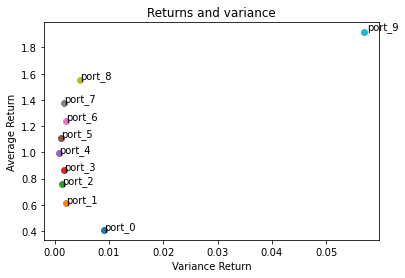

In [11]:
plt.title("Returns and variance")
port_list = ["port_0", "port_1", "port_2", "port_3", "port_4", 
            "port_5", "port_6", "port_7", "port_8", "port_9"]
y = avg_return
x = var_return
for i in range(0, 10):
    plt.scatter(x[i], y[i])
    plt.text(x[i]*(1.01), y[i]*(1.01), port_list[i], fontsize = 10)
# plt.legend(loc = "lower right")
plt.ylabel("Average Return");
plt.xlabel("Variance Return");

#### Comment:
- From the plot above, I find the average returns is consistantly spread out from 1.6 to 0.4. This can be used to show the data is varied enough such that it does not skewed to high returns or low returns. 
- Also from the plot above, the variance also shows how unless for the extreme portfolios (first and last), the rest of the portfolios shows little changes in their total values. This shows how similar the returns of the middle companies are. 
- On the extremem cases of the first and last, it can be interpreted as these companies fluctuates a lot through the past 20 years. The top portfolio returns, and their price are changing over the time. The bottom portfolio shows a lot of return changes over time.

#### Part d)
Check that the portfolios are well-diversified. One way to do this is the following: Divide the variance of the portfolios by its  𝛽 squared. The results should be roughly the same across all portfolios. (The portfolio with the lowest variance may be an exception, for estimating  𝛽  accurately for low-risk portfolios is numerically difficult. However, your results should be consistent for the remaining nine portfolios.)

In [12]:
diverse_value = []
for i in range(0, len(var_return)):
    diverse_value.append(var_return[i]/float(p_beta_df.values[0]))
    print("Portfolio ", i, " has a diverse score of: ", diverse_value[i], "\n")

Portfolio  0  has a diverse score of:  0.0005743627518038517 

Portfolio  1  has a diverse score of:  0.00012872387047843735 

Portfolio  2  has a diverse score of:  9.06998094784005e-05 

Portfolio  3  has a diverse score of:  0.0001095426703355042 

Portfolio  4  has a diverse score of:  5.5543632906405094e-05 

Portfolio  5  has a diverse score of:  7.283162052788862e-05 

Portfolio  6  has a diverse score of:  0.00012725101881055288 

Portfolio  7  has a diverse score of:  0.00011502365987802193 

Portfolio  8  has a diverse score of:  0.0002953648262088365 

Portfolio  9  has a diverse score of:  0.0036254624429545145 



#### Diverse of portfolios:
- The diverse score above suggest a decent balance between all portfolios. While Portfolio 9 has a diverse score much higher than others, it is best able to account the diverse level of top performing stocks

#### Part e)
Repeat parts b) and c) for five-year intervals, i.e., 2002 through 2006, 2007 through 2011, 2012 through 2016 and 2017 through 2021. This procedure is a robustness check to see if your observations hold for individual periods as well.

Period 2002-2006:

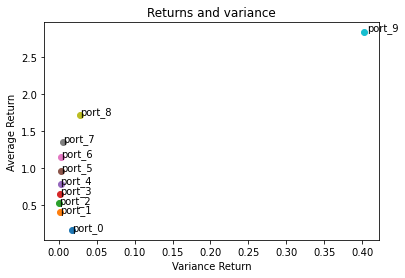

In [13]:
df0206 = df[0:60]
beta = {}
for stock in df.columns[:-1]:
    mod_fit = sm.ols(data=df0206.loc[:, [stock, "MKT"]],
                     formula=stock + "~MKT").fit()
    beta[stock] = mod_fit.params.loc["MKT"]

beta_df = pd.DataFrame.from_dict(beta, orient="index", columns=["Beta"]);
sorted_beta = beta_df.sort_values(by = "Beta", ascending = True)

beta_portfolios = {}
for i in range(0, 10):
    beta_portfolios["port_"+str(i)] = []
    for row in range(0, 36):
        beta_portfolios["port_"+str(i)].append([sorted_beta.index[36 * i + row], 
                                               sorted_beta["Beta"][36 * i + row]])
avg_return = []
var_return = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[1])
    avg_return.append(mean(temp_array))
    var_return.append(variance(temp_array))

stock_array = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[0])
    temp_array.append("MKT")
    stock_array.append(temp_array)

port_0 = df0206[stock_array[0]].copy()
port_0["Sum"] = port_0.sum(axis = 1)
port_1 = df0206[stock_array[1]].copy()
port_1["Sum"] = port_1.sum(axis = 1)
port_2 = df0206[stock_array[2]].copy()
port_2["Sum"] = port_2.sum(axis = 1)
port_3 = df0206[stock_array[3]].copy()
port_3["Sum"] = port_3.sum(axis = 1)
port_4 = df0206[stock_array[4]].copy()
port_4["Sum"] = port_4.sum(axis = 1)
port_5 = df0206[stock_array[5]].copy()
port_5["Sum"] = port_5.sum(axis = 1)
port_6 = df0206[stock_array[6]].copy()
port_6["Sum"] = port_6.sum(axis = 1)
port_7 = df0206[stock_array[7]].copy()
port_7["Sum"] = port_7.sum(axis = 1)
port_8 = df0206[stock_array[8]].copy()
port_8["Sum"] = port_8.sum(axis = 1)
port_9 = df0206[stock_array[9]].copy()
port_9["Sum"] = port_9.sum(axis = 1)
port_list = [port_0, port_1, port_2, port_3, port_4, 
            port_5, port_6, port_7, port_8, port_9]
p_beta = {}
i = 0
for port in port_list:
    mod_fit = sm.ols(data = port, formula = "Sum~MKT").fit()
    p_beta["port_"+str(i)]= mod_fit.params.loc["MKT"]
    i = i + 1
    
p_beta_df = pd.DataFrame.from_dict(p_beta, orient="index", columns=["Beta"])
p_beta_df

plt.title("Returns and variance")
ports_list = ["port_0", "port_1", "port_2", "port_3", "port_4", 
            "port_5", "port_6", "port_7", "port_8", "port_9"]
y = avg_return
x = var_return
for i in range(0, 10):
    plt.scatter(x[i], y[i])
    plt.text(x[i]*(1.01), y[i]*(1.01), ports_list[i], fontsize = 10)
# plt.legend(loc = "lower right")
plt.ylabel("Average Return");
plt.xlabel("Variance Return");

Preiod 2007-2011:

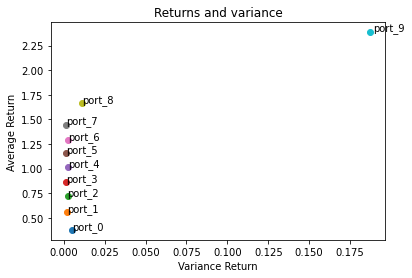

In [14]:
df0711 = df[61:120]
beta = {}
for stock in df.columns[:-1]:
    mod_fit = sm.ols(data=df0711.loc[:, [stock, "MKT"]],
                     formula=stock + "~MKT").fit()
    beta[stock] = mod_fit.params.loc["MKT"]

beta_df = pd.DataFrame.from_dict(beta, orient="index", columns=["Beta"]);
sorted_beta = beta_df.sort_values(by = "Beta", ascending = True)

beta_portfolios = {}
for i in range(0, 10):
    beta_portfolios["port_"+str(i)] = []
    for row in range(0, 36):
        beta_portfolios["port_"+str(i)].append([sorted_beta.index[36 * i + row], 
                                               sorted_beta["Beta"][36 * i + row]])
avg_return = []
var_return = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[1])
    avg_return.append(mean(temp_array))
    var_return.append(variance(temp_array))

stock_array = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[0])
    temp_array.append("MKT")
    stock_array.append(temp_array)

port_0 = df0711[stock_array[0]].copy()
port_0["Sum"] = port_0.sum(axis = 1)
port_1 = df0711[stock_array[1]].copy()
port_1["Sum"] = port_1.sum(axis = 1)
port_2 = df0711[stock_array[2]].copy()
port_2["Sum"] = port_2.sum(axis = 1)
port_3 = df0711[stock_array[3]].copy()
port_3["Sum"] = port_3.sum(axis = 1)
port_4 = df0711[stock_array[4]].copy()
port_4["Sum"] = port_4.sum(axis = 1)
port_5 = df0711[stock_array[5]].copy()
port_5["Sum"] = port_5.sum(axis = 1)
port_6 = df0711[stock_array[6]].copy()
port_6["Sum"] = port_6.sum(axis = 1)
port_7 = df0711[stock_array[7]].copy()
port_7["Sum"] = port_7.sum(axis = 1)
port_8 = df0711[stock_array[8]].copy()
port_8["Sum"] = port_8.sum(axis = 1)
port_9 = df0711[stock_array[9]].copy()
port_9["Sum"] = port_9.sum(axis = 1)
port_list = [port_0, port_1, port_2, port_3, port_4, 
            port_5, port_6, port_7, port_8, port_9]

p_beta = {}
i = 0
for port in port_list:
    mod_fit = sm.ols(data = port, formula = "Sum~MKT").fit()
    p_beta["port_"+str(i)]= mod_fit.params.loc["MKT"]
    i = i + 1
    
p_beta_df = pd.DataFrame.from_dict(p_beta, orient="index", columns=["Beta"])
p_beta_df

plt.title("Returns and variance")
ports_list = ["port_0", "port_1", "port_2", "port_3", "port_4", 
            "port_5", "port_6", "port_7", "port_8", "port_9"]
y = avg_return
x = var_return
for i in range(0, 10):
    plt.scatter(x[i], y[i])
    plt.text(x[i]*(1.01), y[i]*(1.01), ports_list[i], fontsize = 10)
# plt.legend(loc = "lower right")
plt.ylabel("Average Return");
plt.xlabel("Variance Return");

Period 2012-2016:

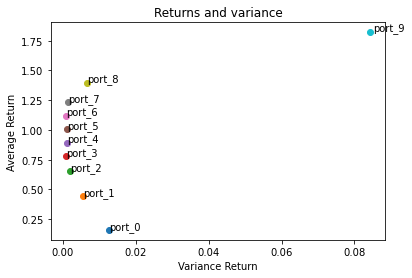

In [15]:
df1216 = df[121:180]
beta = {}
for stock in df.columns[:-1]:
    mod_fit = sm.ols(data=df1216.loc[:, [stock, "MKT"]],
                     formula=stock + "~MKT").fit()
    beta[stock] = mod_fit.params.loc["MKT"]

beta_df = pd.DataFrame.from_dict(beta, orient="index", columns=["Beta"]);
sorted_beta = beta_df.sort_values(by = "Beta", ascending = True)

beta_portfolios = {}
for i in range(0, 10):
    beta_portfolios["port_"+str(i)] = []
    for row in range(0, 36):
        beta_portfolios["port_"+str(i)].append([sorted_beta.index[36 * i + row], 
                                               sorted_beta["Beta"][36 * i + row]])
avg_return = []
var_return = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[1])
    avg_return.append(mean(temp_array))
    var_return.append(variance(temp_array))

stock_array = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[0])
    temp_array.append("MKT")
    stock_array.append(temp_array)

port_0 = df1216[stock_array[0]].copy()
port_0["Sum"] = port_0.sum(axis = 1)
port_1 = df1216[stock_array[1]].copy()
port_1["Sum"] = port_1.sum(axis = 1)
port_2 = df1216[stock_array[2]].copy()
port_2["Sum"] = port_2.sum(axis = 1)
port_3 = df1216[stock_array[3]].copy()
port_3["Sum"] = port_3.sum(axis = 1)
port_4 = df1216[stock_array[4]].copy()
port_4["Sum"] = port_4.sum(axis = 1)
port_5 = df1216[stock_array[5]].copy()
port_5["Sum"] = port_5.sum(axis = 1)
port_6 = df1216[stock_array[6]].copy()
port_6["Sum"] = port_6.sum(axis = 1)
port_7 = df1216[stock_array[7]].copy()
port_7["Sum"] = port_7.sum(axis = 1)
port_8 = df1216[stock_array[8]].copy()
port_8["Sum"] = port_8.sum(axis = 1)
port_9 = df1216[stock_array[9]].copy()
port_9["Sum"] = port_9.sum(axis = 1)
port_list = [port_0, port_1, port_2, port_3, port_4, 
            port_5, port_6, port_7, port_8, port_9]

p_beta = {}
i = 0
for port in port_list:
    mod_fit = sm.ols(data = port, formula = "Sum~MKT").fit()
    p_beta["port_"+str(i)]= mod_fit.params.loc["MKT"]
    i = i + 1
    
p_beta_df = pd.DataFrame.from_dict(p_beta, orient="index", columns=["Beta"])
p_beta_df

plt.title("Returns and variance")
ports_list = ["port_0", "port_1", "port_2", "port_3", "port_4", 
            "port_5", "port_6", "port_7", "port_8", "port_9"]
y = avg_return
x = var_return
for i in range(0, 10):
    plt.scatter(x[i], y[i])
    plt.text(x[i]*(1.01), y[i]*(1.01), ports_list[i], fontsize = 10)
# plt.legend(loc = "lower right")
plt.ylabel("Average Return");
plt.xlabel("Variance Return");

Period 2017-2021:

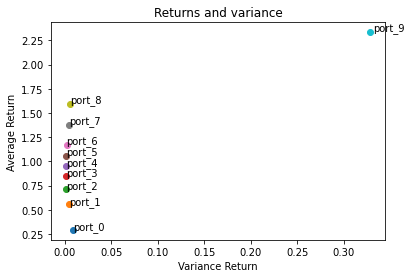

In [16]:
df1721 = df[181:240]
beta = {}
for stock in df.columns[:-1]:
    mod_fit = sm.ols(data=df1721.loc[:, [stock, "MKT"]],
                     formula=stock + "~MKT").fit()
    beta[stock] = mod_fit.params.loc["MKT"]

beta_df = pd.DataFrame.from_dict(beta, orient="index", columns=["Beta"]);
sorted_beta = beta_df.sort_values(by = "Beta", ascending = True)

beta_portfolios = {}
for i in range(0, 10):
    beta_portfolios["port_"+str(i)] = []
    for row in range(0, 36):
        beta_portfolios["port_"+str(i)].append([sorted_beta.index[36 * i + row], 
                                               sorted_beta["Beta"][36 * i + row]])
avg_return = []
var_return = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[1])
    avg_return.append(mean(temp_array))
    var_return.append(variance(temp_array))

stock_array = []
for portfolio in beta_portfolios:
    temp_array = []
    for stock in beta_portfolios[portfolio]:
        temp_array.append(stock[0])
    temp_array.append("MKT")
    stock_array.append(temp_array)

port_0 = df1721[stock_array[0]].copy()
port_0["Sum"] = port_0.sum(axis = 1)
port_1 = df1721[stock_array[1]].copy()
port_1["Sum"] = port_1.sum(axis = 1)
port_2 = df1721[stock_array[2]].copy()
port_2["Sum"] = port_2.sum(axis = 1)
port_3 = df1721[stock_array[3]].copy()
port_3["Sum"] = port_3.sum(axis = 1)
port_4 = df1721[stock_array[4]].copy()
port_4["Sum"] = port_4.sum(axis = 1)
port_5 = df1721[stock_array[5]].copy()
port_5["Sum"] = port_5.sum(axis = 1)
port_6 = df1721[stock_array[6]].copy()
port_6["Sum"] = port_6.sum(axis = 1)
port_7 = df1721[stock_array[7]].copy()
port_7["Sum"] = port_7.sum(axis = 1)
port_8 = df1721[stock_array[8]].copy()
port_8["Sum"] = port_8.sum(axis = 1)
port_9 = df1721[stock_array[9]].copy()
port_9["Sum"] = port_9.sum(axis = 1)
port_list = [port_0, port_1, port_2, port_3, port_4, 
            port_5, port_6, port_7, port_8, port_9]

p_beta = {}
i = 0
for port in port_list:
    mod_fit = sm.ols(data = port, formula = "Sum~MKT").fit()
    p_beta["port_"+str(i)]= mod_fit.params.loc["MKT"]
    i = i + 1
    
p_beta_df = pd.DataFrame.from_dict(p_beta, orient="index", columns=["Beta"])
p_beta_df

plt.title("Returns and variance")
ports_list = ["port_0", "port_1", "port_2", "port_3", "port_4", 
            "port_5", "port_6", "port_7", "port_8", "port_9"]
y = avg_return
x = var_return
for i in range(0, 10):
    plt.scatter(x[i], y[i])
    plt.text(x[i]*(1.01), y[i]*(1.01), ports_list[i], fontsize = 10)
# plt.legend(loc = "lower right")
plt.ylabel("Average Return");
plt.xlabel("Variance Return");

##### Summary Answer:
Based on the repeated trials above from the 4 5-year periods, we can see the similarities between them, especially when it comes to the variance return of the portfolios. While there is always an outstanding one - that returns the most value for investors who has stocks from that group - that portfolio consistantly has the highest variance return. <br>

This is consistant with our knowledge of how top performing companies are usually leaders of the industry, and in this case, would be the lead earning of stock investments. Their variance is large can also be taken into consideration of their growth over the 5-year period. Larger growth or larger value gain would also lead to this high variance. <br>

Lastly, the dipped from period to period also shows the real life market effect, such as the .5 drop in average return and distinctly smaller variance after the 2007-2008 market crash. Also shown again on the 2017-2021 market shrink because innovation and market growth of the US companies at the time. The period between 2012-2016 best portraits a growing and lively market, regrowing back from the 2008 event.  <br> 
>Overall, we have explore how the low volatility anomaly. While it is easy to understand how low volatility stocks can earn steady money, our models have shown them to have slightly less return than high volatility stocks. We should take into consideration how out of 360 stocks we consider, only 36 of them are highly volatile, while the rest are of small volatility, they make up for the rest of the return